Importy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils import  to_categorical

Data cifar10 [DATA SOURCE](https://www.google.com/url?q=https%3A%2F%2Fwww.tensorflow.org%2Fapi_docs%2Fpython%2Ftf%2Fkeras%2Fdatasets%2Fcifar10%2Fload_data)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
y_train=y_train.flatten()
y_test=y_test.flatten()

In [ ]:
labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

x_train, x_val, y_train,y_val= train_test_split(x_train, y_train, test_size=0.25, random_state=1)

Example images from dataset

In [ ]:
def show_example_img(img_x,img_y,t=''):
    plt.figure(figsize=(8, 8))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(img_x[i])
        plt.title(labels[img_y[i]])
    plt.suptitle(t)
    pass

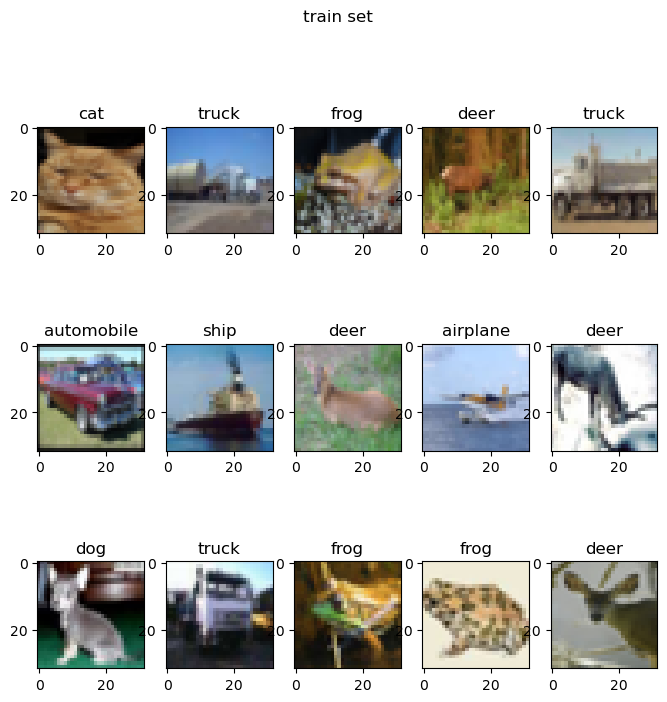

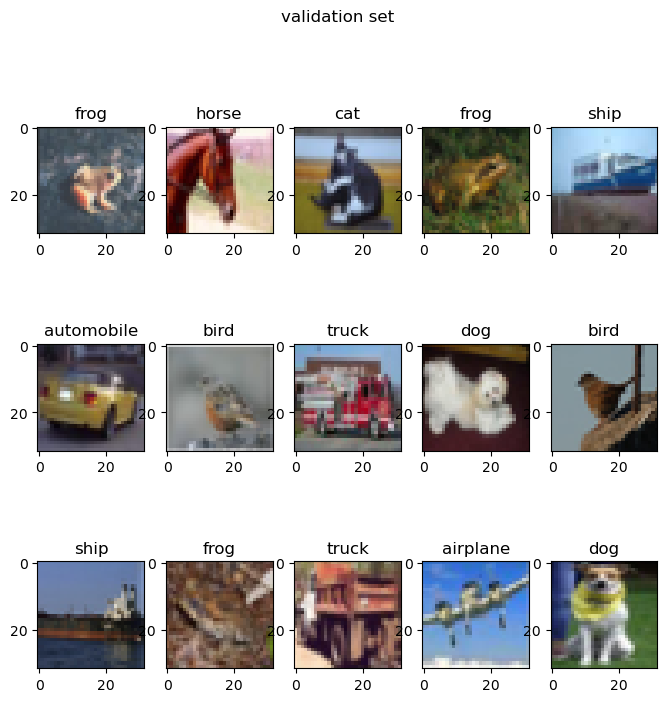

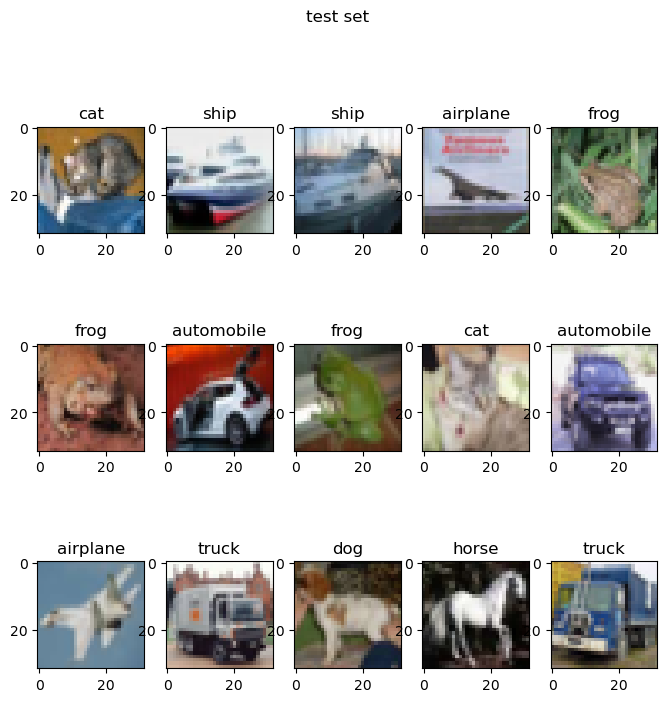

In [ ]:
show_example_img(x_train,y_train,"train set")
show_example_img(x_val,y_val,'validation set')
show_example_img(x_test,y_test,'test set')


Class distribution


In [ ]:

def pandas_class_count(array):
    y = np.bincount(array)
    ii = np.nonzero(y)[0]
    np.vstack((ii,y[ii])).T
    df = pd.DataFrame(np.vstack((ii,y[ii])).T, columns=['index', 'count'])
    df['Class']=labels
    df.set_index('index',inplace=True)
    df=df.sort_values(by=['count'], ascending=False)
    return df


Text(0.5, 1.0, 'validation')

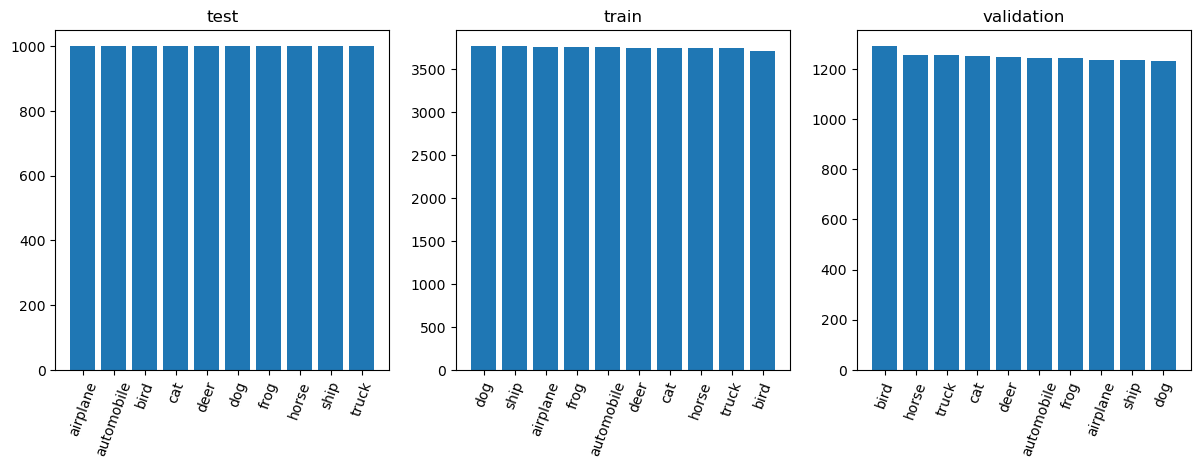

In [ ]:
te_pd=pandas_class_count(y_test)
tr_pd=pandas_class_count(y_train)
v_pd=pandas_class_count(y_val)
plt.figure(figsize=(25, 15))

plt.subplot(3, 5,1)
plt.bar(te_pd['Class'],te_pd['count'])
plt.xticks(rotation=70)
plt.title('test')

plt.subplot(3, 5,2)
plt.bar(tr_pd['Class'],tr_pd['count'])
plt.xticks(rotation=70)
plt.title('train')

plt.subplot(3, 5,3)
plt.bar(v_pd['Class'],v_pd['count'])
plt.xticks(rotation=70)
plt.title('validation')



In [ ]:
def build_model(n, n_layers, dropout, data_aug=0):
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(scale=1./255)(inputs)
    if data_aug!=0:
      x=layers.RandomFlip("horizontal_and_vertical")(inputs)
      x=layers.RandomRotation(0.2)(inputs)

    for _ in range(n_layers):
        x = layers.Conv2D(n, kernel_size=(3,3), activation="relu", padding="same")(x)
        x = layers.Conv2D(n, kernel_size=(3,3), activation="relu", padding="same")(x)
        x = layers.MaxPooling2D(pool_size=(2,2))(x)
        x = layers.Dropout(dropout)(x)
        n *= 2

    x = layers.Flatten()(x)
    x = layers.Dense(n/4, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
his_list=[]
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3)
neurons=[16,32]
layers_t=[3,5]
dropouts=[0.2,0.5,0.7]
for n in neurons:
    for l in layers_t:
        for d in dropouts:
            model=build_model(n, l, d)
            his=model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), callbacks=[callback])
            his_list.append(his)



Epoch 1/5
1172/1172 [==============================] - 33s 28ms/step - loss: 0.2691 - accuracy: 0.3411 - val_loss: 0.2295 - val_accuracy: 0.4680
Epoch 2/5
1172/1172 [==============================] - 32s 27ms/step - loss: 0.2168 - accuracy: 0.4975 - val_loss: 0.1983 - val_accuracy: 0.5570
Epoch 3/5
1172/1172 [==============================] - 33s 28ms/step - loss: 0.1878 - accuracy: 0.5828 - val_loss: 0.1752 - val_accuracy: 0.6120
Epoch 4/5
1172/1172 [==============================] - 32s 27ms/step - loss: 0.1692 - accuracy: 0.6293 - val_loss: 0.1766 - val_accuracy: 0.6149
Epoch 5/5
1172/1172 [==============================] - 32s 27ms/step - loss: 0.1570 - accuracy: 0.6597 - val_loss: 0.2036 - val_accuracy: 0.5851
Epoch 1/5
1172/1172 [==============================] - 32s 27ms/step - loss: 0.2881 - accuracy: 0.2746 - val_loss: 0.2462 - val_accuracy: 0.3968
Epoch 2/5
1172/1172 [==============================] - 31s 27ms/step - loss: 0.2396 - accuracy: 0.4242 - val_loss: 0.2296 - val_ac

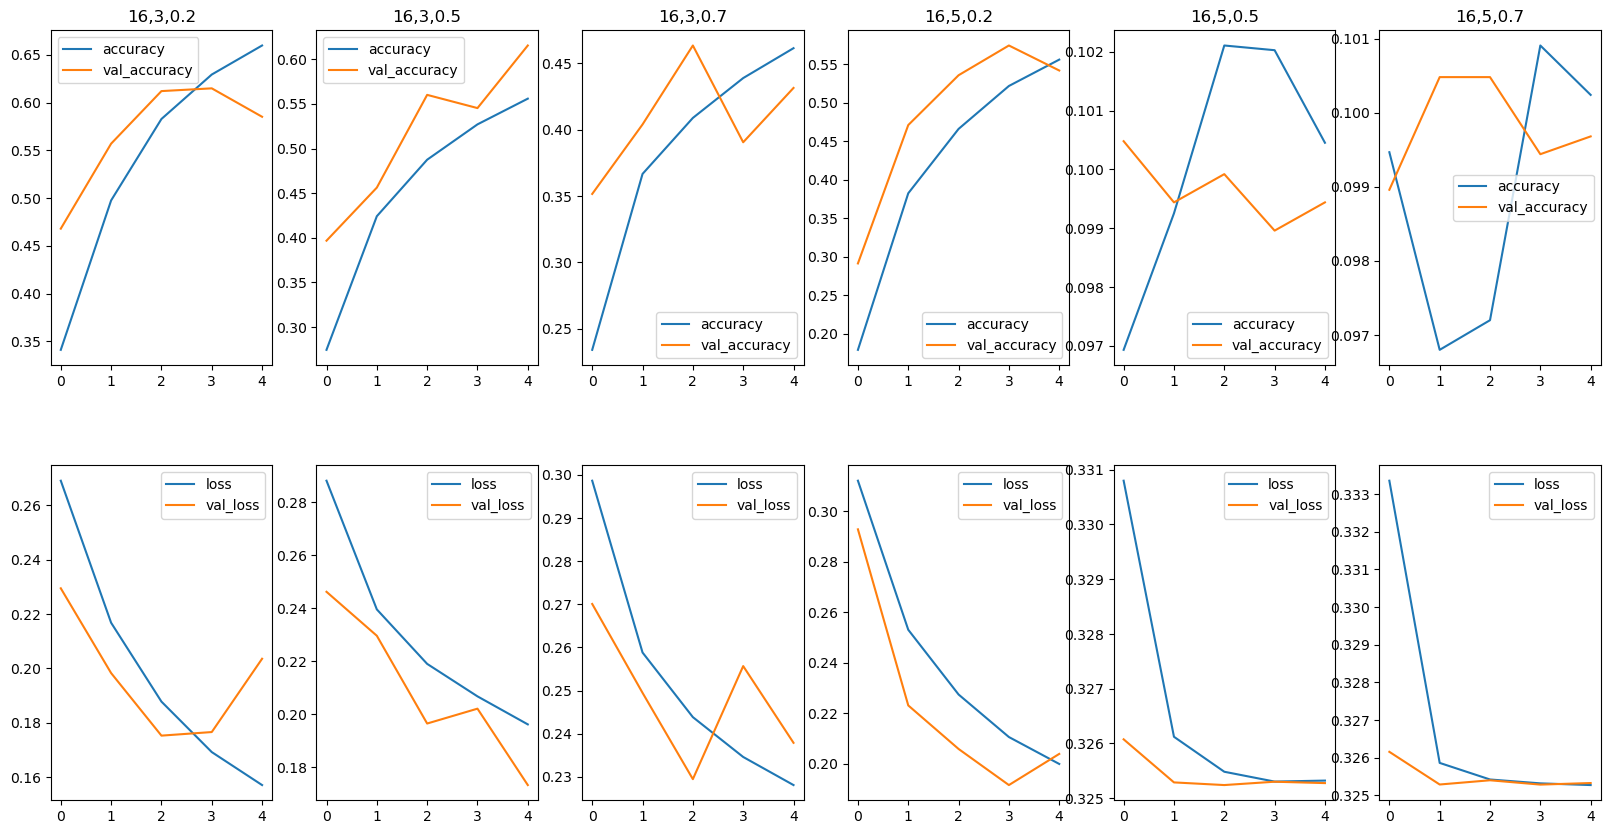

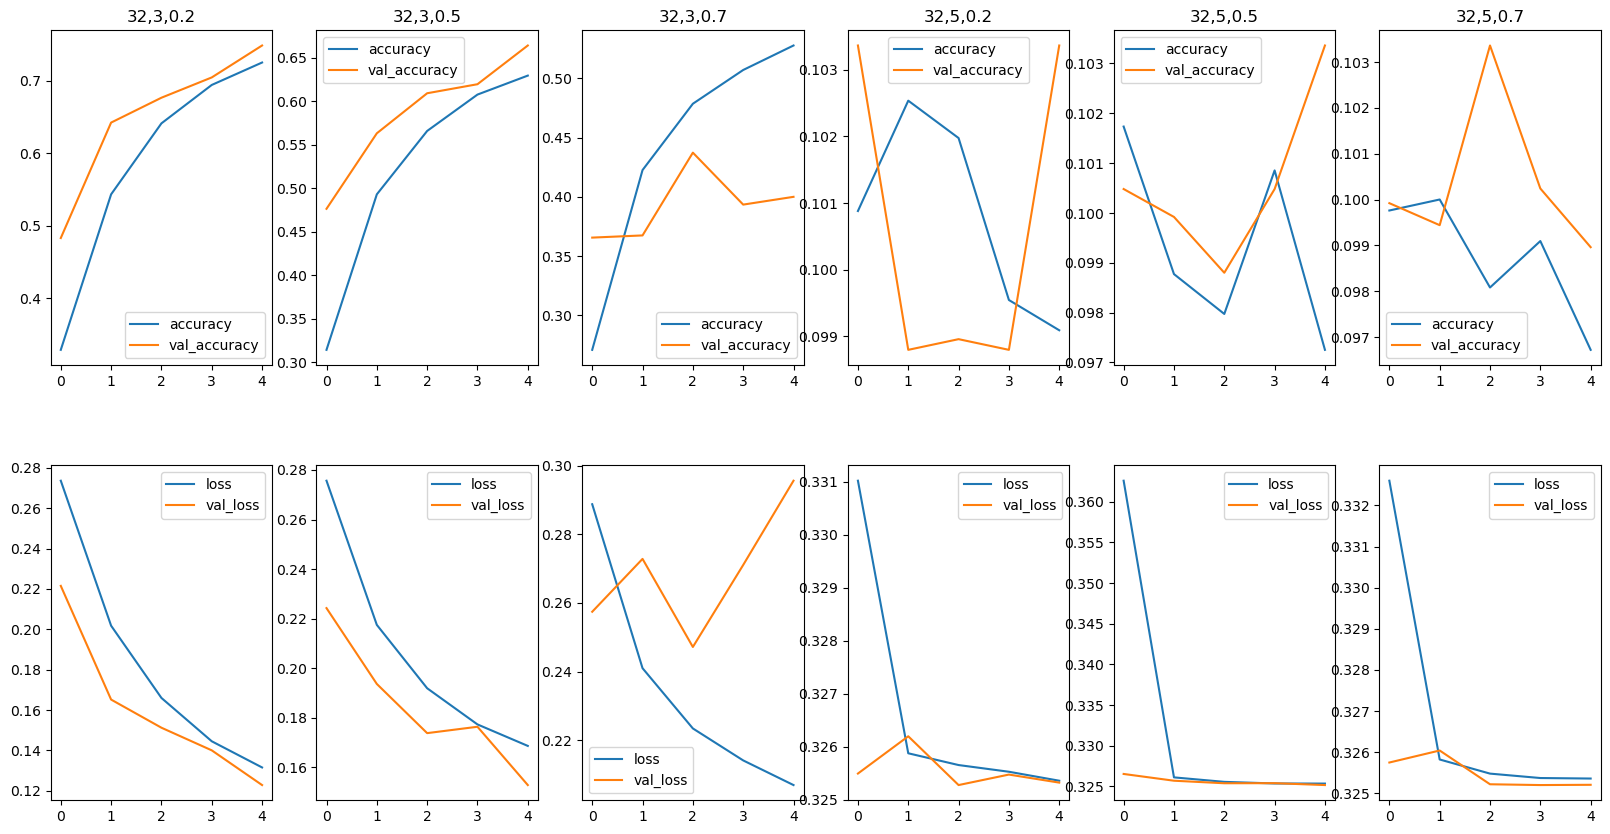

In [ ]:
nn=['16,3,0.2','16,3,0.5','16,3,0.7','16,5,0.2','16,5,0.5','16,5,0.7','32,3,0.2','32,3,0.5','32,3,0.7','32,5,0.2','32,5,0.5','32,5,0.7']
figure, axis = plt.subplots(2, 6, figsize=(20, 10))
for i,x in enumerate(his_list):
    if i<=5:
      axis[0, i].plot(x.history['accuracy'], label='accuracy')
      axis[0, i].plot(x.history['val_accuracy'], label='val_accuracy')
      axis[0, i].set_title(nn[i])
      axis[0, i].legend()
      axis[1, i].plot(x.history['loss'], label='loss')
      axis[1, i].plot(x.history['val_loss'], label='val_loss')
      #axis[1, i].set_title(neurons[i])
      axis[1, i].legend()
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.show()

figure, axis = plt.subplots(2, 6, figsize=(20, 10))
for i,x in enumerate(his_list):
    if i>=6:
      axis[0, i-6].plot(x.history['accuracy'], label='accuracy')
      axis[0, i-6].plot(x.history['val_accuracy'], label='val_accuracy')
      axis[0, i-6].set_title(nn[i])
      axis[0, i-6].legend()
      axis[1, i-6].plot(x.history['loss'], label='loss')
      axis[1, i-6].plot(x.history['val_loss'], label='val_loss')
      #axis[1, i-6].set_title(neurons[i])
      axis[1, i-6].legend()
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.show()

In [ ]:
model=build_model(32, 3, 0.2)
his=model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val), callbacks=[callback])

Epoch 1/15
1172/1172 [==============================] - 64s 54ms/step - loss: 0.2659 - accuracy: 0.3504 - val_loss: 0.2130 - val_accuracy: 0.5142
Epoch 2/15
1172/1172 [==============================] - 63s 54ms/step - loss: 0.1920 - accuracy: 0.5707 - val_loss: 0.1676 - val_accuracy: 0.6253
Epoch 3/15
1172/1172 [==============================] - 62s 53ms/step - loss: 0.1589 - accuracy: 0.6558 - val_loss: 0.1428 - val_accuracy: 0.6929
Epoch 4/15
1172/1172 [==============================] - 58s 50ms/step - loss: 0.1399 - accuracy: 0.7041 - val_loss: 0.1314 - val_accuracy: 0.7213
Epoch 5/15
1172/1172 [==============================] - 60s 51ms/step - loss: 0.1279 - accuracy: 0.7344 - val_loss: 0.1259 - val_accuracy: 0.7417
Epoch 6/15
1172/1172 [==============================] - 62s 53ms/step - loss: 0.1204 - accuracy: 0.7523 - val_loss: 0.1336 - val_accuracy: 0.7224
Epoch 7/15
1172/1172 [==============================] - 62s 53ms/step - loss: 0.1163 - accuracy: 0.7631 - val_loss: 0.1161 -

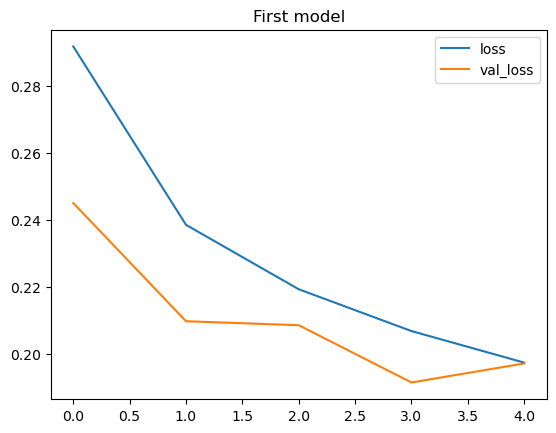

In [ ]:
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model with L1')
plt.show()

In [ ]:
plt.plot(his.history['loss'], label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Model with L1')
plt.show()

In [ ]:
model=build_model(32, 3, 0.2,1)
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=2)
his=model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[callback])